# RF



## Data Set 1

In [49]:
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd



In [50]:
import pandas as pd

# Updated Google Sheets link setup
sheet_id = "1j_Euo80PrGckVDVr2hTG9zZebxJD0TSC"
sheet_name = "Sheet1"  # Update this if the sheet name is different

# Generate the CSV export link
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Read the Google Sheet as CSV
df = pd.read_csv(csv_url)

# Backup original DataFrame
df_backup = df.copy()


# Set Date as the index
df = df.set_index('Date')

# Display the DataFrame (optional in scripts)
df.head()
df_backup=df.copy()

df = df.drop(columns=["YEAR", "MO", "DY"])

df

,PREC,SURF_PRESSSURE,MAX_TEMP,MIN_TEMP,RH,AVG_TEMP,SL_PRESSURE,CLOUD_COVER,WS10M,WD_sin,WD_cos,MONOSOON_SEASON_Northeast_Monsoon,MONOSOON_SEASON_Second_Inter_Monsoon,MONOSOON_SEASON_Southwest_Monsoon
Date,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.22,99.57,28.16,23.90,85.13,28.5,1009.2,5.0,3.99,0.600420,0.799685,True,False,False
2013-01-02 00:00:00,1.09,99.65,27.65,23.41,86.19,27.6,1010.4,5.0,4.25,0.500000,0.866025,True,False,False
2013-01-03 00:00:00,13.42,99.68,28.38,23.42,86.26,26.4,1011.0,8.0,4.75,0.439939,0.898028,True,False,False
2013-01-04 00:00:00,8.79,99.65,27.58,22.93,86.31,25.1,1010.1,8.0,5.74,0.424199,0.905569,True,False,False
2013-01-05 00:00:00,2.60,99.50,26.16,22.17,86.88,26.9,1007.5,8.0,5.79,0.563526,0.826098,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 00:00:00,9.45,99.66,30.35,24.40,88.57,29.5,1011.0,5.0,6.43,0.381070,0.924546,True,False,False
2023-12-28 00:00:00,13.93,99.58,29.37,25.51,90.59,28.5,1010.9,7.0,3.93,0.634731,0.772734,True,False,False
2023-12-29 00:00:00,9.80,99.69,29.30,25.03,89.03,28.2,1011.4,7.0,2.59,0.689620,0.724172,True,False,False


In [51]:
df.columns

Index(['PREC', 'SURF_PRESSSURE', 'MAX_TEMP', 'MIN_TEMP', 'RH', 'AVG_TEMP',
       'SL_PRESSURE', 'CLOUD_COVER', 'WS10M', 'WD_sin', 'WD_cos',
       'MONOSOON_SEASON_Northeast_Monsoon',
       'MONOSOON_SEASON_Second_Inter_Monsoon',
       'MONOSOON_SEASON_Southwest_Monsoon'],
      dtype='object')

In [52]:
df=df[["WS10M"]]
df.columns
df

,WS10M
Date,
2013-01-01 00:00:00,3.99
2013-01-02 00:00:00,4.25
2013-01-03 00:00:00,4.75
2013-01-04 00:00:00,5.74
2013-01-05 00:00:00,5.79
...,...
2023-12-27 00:00:00,6.43
2023-12-28 00:00:00,3.93
2023-12-29 00:00:00,2.59


In [53]:

# Define the number of lag terms
num_lags = 3

# Create lag features for each column in the dataset
lagged_df = df.copy()
for lag in range(1, num_lags + 1):
    lagged_features = df.shift(lag).add_suffix(f'_lag{lag}')
    lagged_df = pd.concat([lagged_df, lagged_features], axis=1)

# Drop rows with NaN values (since initial lags will have missing values)
lagged_df = lagged_df.dropna()



# Display the first few rows
print(lagged_df.head())
lagged_df

                     WS10M  WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                          
2013-01-04 00:00:00   5.74        4.75        4.25        3.99
2013-01-05 00:00:00   5.79        5.74        4.75        4.25
2013-01-06 00:00:00   4.52        5.79        5.74        4.75
2013-01-07 00:00:00   4.66        4.52        5.79        5.74
2013-01-08 00:00:00   3.61        4.66        4.52        5.79


,WS10M,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


In [54]:
# Filter column names starting with 'WS'
filtered_columns = [col for col in df.columns if col.startswith('C')]
filtered_df = df[filtered_columns]
filtered_df.columns

Index([], dtype='object')

In [55]:
df = lagged_df
df

,WS10M,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


## Data Sets

# 1

In [56]:

df

,WS10M,WS10M_lag1,WS10M_lag2,WS10M_lag3
Date,,,,
2013-01-04 00:00:00,5.74,4.75,4.25,3.99
2013-01-05 00:00:00,5.79,5.74,4.75,4.25
2013-01-06 00:00:00,4.52,5.79,5.74,4.75
2013-01-07 00:00:00,4.66,4.52,5.79,5.74
2013-01-08 00:00:00,3.61,4.66,4.52,5.79
...,...,...,...,...
2023-12-27 00:00:00,6.43,6.01,4.29,3.64
2023-12-28 00:00:00,3.93,6.43,6.01,4.29
2023-12-29 00:00:00,2.59,3.93,6.43,6.01


In [57]:
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [58]:
# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]


In [59]:
numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2013-01-04 00:00:00        4.75        4.25        3.99
2013-01-05 00:00:00        5.74        4.75        4.25
2013-01-06 00:00:00        5.79        5.74        4.75
2013-01-07 00:00:00        4.52        5.79        5.74
2013-01-08 00:00:00        4.66        4.52        5.79
y_train:
Date
2013-01-04 00:00:00    5.74
2013-01-05 00:00:00    5.79
2013-01-06 00:00:00    4.52
2013-01-07 00:00:00    4.66
2013-01-08 00:00:00    3.61
Name: WS10M, dtype: float64
X_test:
                     WS10M_lag1  WS10M_lag2  WS10M_lag3
Date                                                   
2021-10-20 00:00:00        3.92        6.13        6.84
2021-10-21 00:00:00        2.82        3.92        6.13
2021-10-22 00:00:00        2.79        2.82        3.92
2021-10-23 00:00:00        2.72        2.79        2.82
2021-10-24 00:00:00        4.30        2.72        2.79
y_test:
Date
2021

### Optuna

In [60]:
!pip install optuna

In [61]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the objective function for optimization
def objective(trial):
    # Optimized parameter space (bootstrap removed)
    n_estimators = trial.suggest_int('n_estimators', 50, 200, step=50)
    max_depth = trial.suggest_categorical('max_depth', [None, 10, 20, 30])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 7)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Define the model with the suggested hyperparameters
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict the values
    y_test_pred = rf_model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) on test set
    test_mse = mean_squared_error(y_test, y_test_pred)

    return test_mse  # Minimize the test set MSE

# Set up the Optuna study using TPE Sampler
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=50)

# Get the best parameters found by Optuna
best_params = study.best_params
print(f"\n✅ Best Parameters Found by Optuna:\n{best_params}")

# Use the best model for final prediction
best_rf_optuna = RandomForestRegressor(**best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)

# Make predictions
y_train_pred_optuna = best_rf_optuna.predict(X_train)
y_test_pred_optuna = best_rf_optuna.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse_optuna = mean_squared_error(y_train, y_train_pred_optuna)
test_mse_optuna = mean_squared_error(y_test, y_test_pred_optuna)

train_mae_optuna = mean_absolute_error(y_train, y_train_pred_optuna)
test_mae_optuna = mean_absolute_error(y_test, y_test_pred_optuna)

train_rmse_optuna = np.sqrt(train_mse_optuna)
test_rmse_optuna = np.sqrt(test_mse_optuna)

# R-squared (coefficient of determination)
train_r2_optuna = r2_score(y_train, y_train_pred_optuna)
test_r2_optuna = r2_score(y_test, y_test_pred_optuna)

# Avoid division by zero in MAPE
train_mape_optuna = np.mean(np.abs((y_train - y_train_pred_optuna) / np.maximum(y_train, 1e-8))) * 100
test_mape_optuna = np.mean(np.abs((y_test - y_test_pred_optuna) / np.maximum(y_test, 1e-8))) * 100

# Print metrics
print("\n📊 Evaluation Metrics:")
print(f"Train MSE: {train_mse_optuna:.4f}, Test MSE: {test_mse_optuna:.4f}")
print(f"Train MAE: {train_mae_optuna:.4f}, Test MAE: {test_mae_optuna:.4f}")
print(f"Train RMSE: {train_rmse_optuna:.4f}, Test RMSE: {test_rmse_optuna:.4f}")
print(f"Train MAPE: {train_mape_optuna:.2f}%, Test MAPE: {test_mape_optuna:.2f}%")
print(f"Train R²: {train_r2_optuna:.4f}, Test R²: {test_r2_optuna:.4f}")

# Create DataFrame from study
optuna_results = study.trials_dataframe()

# Extract relevant columns (bootstrap removed)
cols_to_extract = [
    'number', 'value',
    'params_n_estimators', 'params_max_depth', 'params_min_samples_split',
    'params_min_samples_leaf', 'params_max_features'
]

optuna_table_df = optuna_results[cols_to_extract]

# Rename for display
optuna_table_df.columns = [
    'Trial', 'Test MSE', 'n_estimators', 'max_depth', 'min_samples_split',
    'min_samples_leaf', 'max_features'
]

# Create Plotly Table
fig_table_optuna = go.Figure(data=[go.Table(
    header=dict(values=list(optuna_table_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[optuna_table_df[col] for col in optuna_table_df.columns],
               fill_color='lavender',
               align='left'))
])

fig_table_optuna.update_layout(
    title="Optuna Results - Random Forest Hyperparameter Tuning (No Bootstrap)",
    height=600,
    template='plotly_white'
)

fig_table_optuna.show()


[I 2025-07-07 04:03:35,552] A new study created in memory with name: no-name-c623d150-952e-4c3b-8d62-2280a98bf2ec
[I 2025-07-07 04:03:36,001] Trial 0 finished with value: 0.7957223967475192 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7957223967475192.
[I 2025-07-07 04:03:36,179] Trial 1 finished with value: 0.7735545857485127 and parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7735545857485127.
[I 2025-07-07 04:03:36,705] Trial 2 finished with value: 0.7764011763556624 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.7735545857485127.
[I 2025-07-07 04:03:37,205] Trial 3 finished with value: 0.778582046098324 and parameters: {'n_estimators': 150, 'max_depth': 30, 


✅ Best Parameters Found by Optuna:
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2'}

📊 Evaluation Metrics:
Train MSE: 0.4374, Test MSE: 0.7695
Train MAE: 0.5030, Test MAE: 0.6734
Train RMSE: 0.6614, Test RMSE: 0.8772
Train MAPE: 14.75%, Test MAPE: 18.86%
Train R²: 0.8264, Test R²: 0.6809


Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}
Optuna Train MSE: 1.0992, Optuna Test MSE: 1.3958
Optuna Train MAE: 0.7959, Optuna Test MAE: 0.9072
Optuna Train RMSE: 1.0484, Optuna Test RMSE: 1.1814
Optuna Train MAPE: 19.4765%, Optuna Test MAPE: 20.5845%

In [62]:
train_mse_optuna

0.4374437287052403

In [63]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_optuna, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_optuna, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [64]:
# Evaluate the model performance
train_mse_optuna
test_mse_optuna

train_mae_optuna
test_mae_optuna

train_rmse_optuna
test_rmse_optuna

# Mean Absolute Percentage Error (MAPE)
train_mape_optuna
test_mape_optuna

np.float64(18.858197717542545)

### Original

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit with desired number of splits (e.g., 5)
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics for each fold
train_mse_list, test_mse_list = [], []
train_mae_list, test_mae_list = [], []
train_rmse_list, test_rmse_list = [], []
train_mape_list, test_mape_list = [], []
train_r2_list, test_r2_list = [], []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mape = np.mean(np.abs((y_train - y_train_pred) / np.maximum(y_train, 1e-8))) * 100
    test_mape = np.mean(np.abs((y_test - y_test_pred) / np.maximum(y_test, 1e-8))) * 100

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append results for each fold
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mape_list.append(train_mape)
    test_mape_list.append(test_mape)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

# Calculate average metrics over all folds and assign to variables
Original_Train_MSE = np.mean(train_mse_list)
Original_Test_MSE = np.mean(test_mse_list)

Original_Train_MAE = np.mean(train_mae_list)
Original_Test_MAE = np.mean(test_mae_list)

Original_Train_RMSE = np.mean(train_rmse_list)
Original_Test_RMSE = np.mean(test_rmse_list)

Original_Train_MAPE = np.mean(train_mape_list)
Original_Test_MAPE = np.mean(test_mape_list)

Original_Train_R2 = np.mean(train_r2_list)
Original_Test_R2 = np.mean(test_r2_list)

# Print the assigned values
print(f"\n📊 Cross-Validated Average Metrics:")
print(f"Train MSE: {Original_Train_MSE:.4f}, Test MSE: {Original_Test_MSE:.4f}")
print(f"Train MAE: {Original_Train_MAE:.4f}, Test MAE: {Original_Test_MAE:.4f}")
print(f"Train RMSE: {Original_Train_RMSE:.4f}, Test RMSE: {Original_Test_RMSE:.4f}")
print(f"Train MAPE: {Original_Train_MAPE:.2f}%, Test MAPE: {Original_Test_MAPE:.2f}%")
print(f"Train R²: {Original_Train_R2:.4f}, Test R²: {Original_Test_R2:.4f}")



📊 Cross-Validated Average Metrics:
Train MSE: 0.0927, Test MSE: 0.7691
Train MAE: 0.2314, Test MAE: 0.6679
Train RMSE: 0.3042, Test RMSE: 0.8764
Train MAPE: 6.74%, Test MAPE: 19.24%
Train R²: 0.9626, Test R²: 0.6884


In [66]:
import plotly.graph_objects as go

# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


### Grid Search CV HYper Parameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define parameter grid (bootstrap removed)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Valid options only
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# TimeSeriesSplit ensures training precedes testing in time
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Extract best parameters and model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_rf_grid = grid_search.best_estimator_

# Predict with best model
y_train_pred_grid = best_rf_grid.predict(X_train)
y_test_pred_grid = best_rf_grid.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
train_mse = mean_squared_error(y_train, y_train_pred_grid)
test_mse = mean_squared_error(y_test, y_test_pred_grid)

train_mae = mean_absolute_error(y_train, y_train_pred_grid)
test_mae = mean_absolute_error(y_test, y_test_pred_grid)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred_grid)
test_r2 = r2_score(y_test, y_test_pred_grid)

# Handle division by zero in MAPE
train_mape = np.mean(np.abs((y_train - y_train_pred_grid) / np.maximum(y_train, 1e-8))) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred_grid) / np.maximum(y_test, 1e-8))) * 100

# Output results
print(f"✅ Best Hyperparameters: {best_params}")
print(f"📉 Best CV Score (Negative MSE): {best_score:.4f}")
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: {train_mape:.2f}%, Test MAPE: {test_mape:.2f}%")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
✅ Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
📉 Best CV Score (Negative MSE): -0.7069
Train MSE: 0.4168, Test MSE: 0.7223
Train MAE: 0.5012, Test MAE: 0.6579
Train RMSE: 0.6456, Test RMSE: 0.8499
Train MAPE: 14.64%, Test MAPE: 17.94%
Train R²: 0.8329, Test R²: 0.7086


tting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best CV Score: -1.3954
Train MSE: 0.8237, Test MSE: 1.2494
Train MAE: 0.6895, Test MAE: 0.8657
Train RMSE: 0.9076, Test RMSE: 1.1178
Train MAPE: 17.0530%, Test MAPE: 19.2603%

In [68]:
# Calculate and print evaluation metrics
grid_train_mse =train_mse
grid_test_mse =test_mse
grid_train_mae = train_mae
grid_test_mae =test_mae
grid_train_rmse = train_rmse
grid_test_rmse = test_rmse
grid_train_mape = train_mape
grid_test_mape = test_mape

In [69]:
import plotly.graph_objects as go
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred_grid, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred_grid, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import plotly.graph_objects as go

# Fit the Random Forest model with tuned parameters
rf_tuned = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

# Train the model
rf_tuned.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_tuned.predict(X_test)

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print performance metrics
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAPE: {test_mape:.4f}%")

# Extract test set datetime index
test_dates = X_test.index

# Plot actual vs predicted values for test set
fig = go.Figure()

# Plot actual test values
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Actual Test', line=dict(color='green')))

# Plot predicted test values
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Predicted Test', line=dict(color='red', dash='dot')))

# Customize layout
fig.update_layout(
    title="Actual vs Predicted Values for Test Set",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


Test MSE: 0.7206
Test MAE: 0.6564
Test RMSE: 0.8489
Test MAPE: 17.8740%


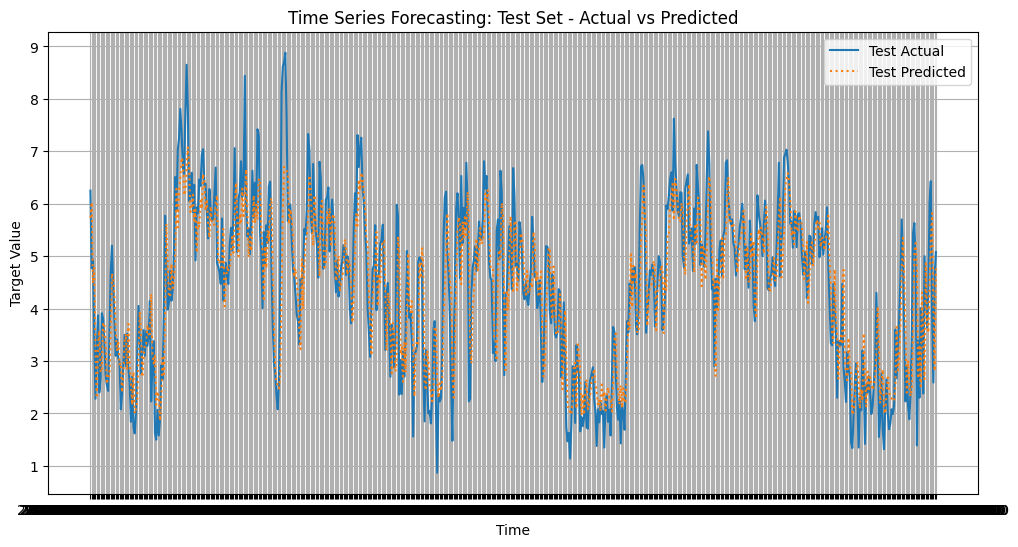

In [71]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot test actual values
plt.plot(y_test.index, y_test, label='Test Actual')

# Plot test predicted values
plt.plot(y_test.index, y_test_pred, label='Test Predicted', linestyle='dotted')

# Customize layout
plt.title("Time Series Forecasting: Test Set - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Random Search CV

In [72]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Define the Random Forest Regressor model with fixed random seed
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {

    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
            # Whether bootstrap samples are used when building trees
}

# Set up the TimeSeriesSplit object for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Set up RandomizedSearchCV with random_state and TimeSeriesSplit
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,
    cv=tscv,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42,       # Fixed random seed here
    refit=True
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
random_best_params = random_search.best_params_
random_best_rf = random_search.best_estimator_

print(f"Best Parameters: {random_best_params}")

# Make predictions on train and test sets
y_train_pred_random = random_best_rf.predict(X_train)
y_test_pred_random = random_best_rf.predict(X_test)

from sklearn.metrics import r2_score

# Evaluate performance
random_train_mse = mean_squared_error(y_train, y_train_pred_random)
random_test_mse = mean_squared_error(y_test, y_test_pred_random)

random_train_mae = mean_absolute_error(y_train, y_train_pred_random)
random_test_mae = mean_absolute_error(y_test, y_test_pred_random)

random_train_rmse = np.sqrt(random_train_mse)
random_test_rmse = np.sqrt(random_test_mse)

random_train_mape = np.mean(np.abs((y_train - y_train_pred_random) / np.maximum(y_train, 1e-8))) * 100
random_test_mape = np.mean(np.abs((y_test - y_test_pred_random) / np.maximum(y_test, 1e-8))) * 100

# R-squared
random_train_r2 = r2_score(y_train, y_train_pred_random)
random_test_r2 = r2_score(y_test, y_test_pred_random)

# Print metrics
print(f"Random Train MSE: {random_train_mse:.4f}, Random Test MSE: {random_test_mse:.4f}")
print(f"Random Train MAE: {random_train_mae:.4f}, Random Test MAE: {random_test_mae:.4f}")
print(f"Random Train RMSE: {random_train_rmse:.4f}, Random Test RMSE: {random_test_rmse:.4f}")
print(f"Random Train MAPE: {random_train_mape:.2f}%, Random Test MAPE: {random_test_mape:.2f}%")
print(f"Random Train R²: {random_train_r2:.4f}, Random Test R²: {random_test_r2:.4f}")

# Create a DataFrame from the random search results
random_search_results = pd.DataFrame(random_search.cv_results_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Random Train MSE: 0.4448, Random Test MSE: 0.7206
Random Train MAE: 0.5113, Random Test MAE: 0.6564
Random Train RMSE: 0.6670, Random Test RMSE: 0.8489
Random Train MAPE: 14.97%, Random Test MAPE: 17.87%
Random Train R²: 0.8217, Random Test R²: 0.7092


ting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Random Train MSE: 0.8575, Random Test MSE: 1.2427
Random Train MAE: 0.7003, Random Test MAE: 0.8626
Random Train RMSE: 0.9260, Random Test RMSE: 1.1147
Random Train MAPE: 17.3376%, Random Test MAPE: 19.1552%

In [73]:
import plotly.graph_objects as go
y_train_pred=y_train_pred_random
y_test_pred=y_test_pred_random
# Assuming X_train and X_test have datetime index, extract the datetime values
train_dates = X_train.index
test_dates = X_test.index

# Create a time series plot with actual and predicted values for training and test sets
fig = go.Figure()

# Plot Y_train (Actual values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train, mode='lines', name='Y Train', line=dict(color='blue')))

# Plot Y_test (Actual values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test, mode='lines', name='Y Test', line=dict(color='green')))

# Plot Y_train_predicted (Predicted values for train set)
fig.add_trace(go.Scatter(x=train_dates, y=y_train_pred, mode='lines', name='Y Train Predicted', line=dict(color='orange', dash='dot')))

# Plot Y_test_predicted (Predicted values for test set)
fig.add_trace(go.Scatter(x=test_dates, y=y_test_pred, mode='lines', name='Y Test Predicted', line=dict(color='red', dash='dot')))

# Customize the layout of the plot
fig.update_layout(
    title="Actual vs Predicted Values for Training and Test Sets",
    xaxis_title="Date",
    yaxis_title="Target Variable",
    template="plotly_white"
)

# Show the plot
fig.show()


In [74]:
import pandas as pd

# Define the model evaluation results
results = {
    "Model": ["Original", "Grid Search CV", "Random Search CV", "Optuna"],
    "Train MSE": [Original_Train_MSE, grid_train_mse, random_train_mse, train_mse_optuna],
    "Test MSE": [Original_Test_MSE, grid_test_mse, random_test_mse, test_mse_optuna],
    "Train MAE": [Original_Train_MAE, grid_train_mae, random_train_mae, train_mae_optuna],
    "Test MAE": [Original_Test_MAE, grid_test_mae, random_test_mae, test_mae_optuna],
    "Train RMSE": [Original_Train_RMSE, grid_train_rmse, random_train_rmse, train_rmse_optuna],
    "Test RMSE": [Original_Test_RMSE, grid_test_rmse, random_test_rmse, test_rmse_optuna],
    "Train MAPE (%)": [Original_Train_MAPE, grid_train_mape, random_train_mape, train_mape_optuna],
    "Test MAPE (%)": [Original_Test_MAPE, grid_test_mape, random_test_mape, test_mape_optuna],
}

# Convert dictionary to Pandas DataFrame
df_results = pd.DataFrame(results)

# Print the title
print("\n" + "="*40)
print("Variable Set 1 - Random Forest Modelling")
print("="*40 + "\n")

# Display the table
print(df_results)

# Save the DataFrame to a CSV file
df_results.to_csv("variableSet_1_random_forest_results.csv", index=False)

print("\nResults saved to 'variableSet_1_random_forest_results.csv'")



Variable Set 1 - Random Forest Modelling

              Model  Train MSE  Test MSE  Train MAE  Test MAE  Train RMSE  \
0          Original   0.092690  0.769133   0.231397  0.667903    0.304171   
1    Grid Search CV   0.416796  0.722260   0.501209  0.657865    0.645597   
2  Random Search CV   0.444847  0.720643   0.511306  0.656374    0.666968   
3            Optuna   0.437444  0.769539   0.503016  0.673365    0.661395   

   Test RMSE  Train MAPE (%)  Test MAPE (%)  
0   0.876419        6.736428      19.241168  
1   0.849859       14.639161      17.937191  
2   0.848907       14.970692      17.874015  
3   0.877233       14.746543      18.858198  

Results saved to 'variableSet_1_random_forest_results.csv'


========================================
Variable Set 1 - Random Forest Modelling
========================================

              Model  Train MSE  Test MSE  Train MAE  Test MAE  Train RMSE  \
0          Original   0.176040  1.496884   0.316193  0.929701    0.419168   
1    Grid Search CV   0.823687  1.249446   0.689487  0.865748    0.907572   
2  Random Search CV   0.857528  1.242665   0.700335  0.862600    0.926028   
3            Optuna   1.077240  1.360843   0.786072  0.896452    1.037902   

   Test RMSE  Train MAPE (%)  Test MAPE (%)  
0   1.222728        7.596065      22.536162  
1   1.117786       17.053017      19.260350  
2   1.114749       17.337630      19.155166  
3   1.166552       19.256020      20.342696  

Results saved to 'variableSet_1_random_forest_results.csv'